# SABIC's Financial Analysis

This notebook performs a comprehensive financial analysis of SABIC (Saudi Basic Industries Corporation) data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the SABIC raw data from the CSV file
sabic_raw_data = pd.read_csv('sabic__data.csv')

# Display the first few rows to understand the data structure
sabic_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,SABIC,Petrochemicals,139737384,8462836,14833007,310365751,99114429
1,2020,SABIC,Petrochemicals,116949287,1256229,4573937,295468550,101231425
2,2021,SABIC,Petrochemicals,174883126,30501771,33242175,319355328,1075222030
3,2022,SABIC,Petrochemicals,183080000,16530000,22910000,313105817,95488558
4,2023,SABIC,Petrochemicals,141540000,-2770000,3720000,294380000,99100000


In [3]:
# Get a summary of the dataset including data types and non-null counts
sabic_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in SABIC’s financial statements.

In [4]:
# Sort the data by year to ensure chronological order
sabic_raw_data = sabic_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
sabic_raw_data[numeric_cols] = sabic_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
sabic_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,SABIC,Petrochemicals,139737384.0,8462836.0,14833007.0,310365751.0,9.911443e+07
1,2020,SABIC,Petrochemicals,116949287.0,1256229.0,4573937.0,295468550.0,1.012314e+08
2,2021,SABIC,Petrochemicals,174883126.0,30501771.0,33242175.0,319355328.0,1.075222e+09
3,2022,SABIC,Petrochemicals,183080000.0,16530000.0,22910000.0,313105817.0,9.548856e+07
4,2023,SABIC,Petrochemicals,141540000.0,-2770000.0,3720000.0,294380000.0,9.910000e+07
5,2024,SABIC,Petrochemicals,139980000.0,1540000.0,5740000.0,278020000.0,9.410000e+07


In [5]:
# Create a copy of the raw data for analysis to avoid modifying the original
sabic_new_data = sabic_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
sabic_new_data['Revenue_Growth_%'] = sabic_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(sabic_new_data['Revenue_SAR'].iloc[0], sabic_new_data['Revenue_SAR'].iloc[-1], len(sabic_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 0.03%


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
sabic_new_data['Operating_Margin_%'] = (sabic_new_data['Operating_Income_SAR'] / sabic_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
sabic_new_data['Net_Profit_Margin_%'] = (sabic_new_data['Net_Income_SAR'] / sabic_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(sabic_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019           10.614917             6.056243
1  2020            3.911043             1.074166
2  2021           19.008223            17.441232
3  2022           12.513655             9.028840
4  2023            2.628232            -1.957044
5  2024            4.100586             1.100157


## Financial Position

In [9]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
sabic_new_data['Liabilities_to_Assets_Ratio'] = (sabic_new_data['Total_Liabilities_SAR'] / sabic_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
sabic_new_data['Asset_Turnover_Ratio'] = sabic_new_data['Revenue_SAR'] / sabic_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(sabic_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    31.934719              0.450235
1  2020                    34.261320              0.395810
2  2021                   336.685170              0.547613
3  2022                    30.497216              0.584722
4  2023                    33.663972              0.480807
5  2024                    33.846486              0.503489


## Visualizations

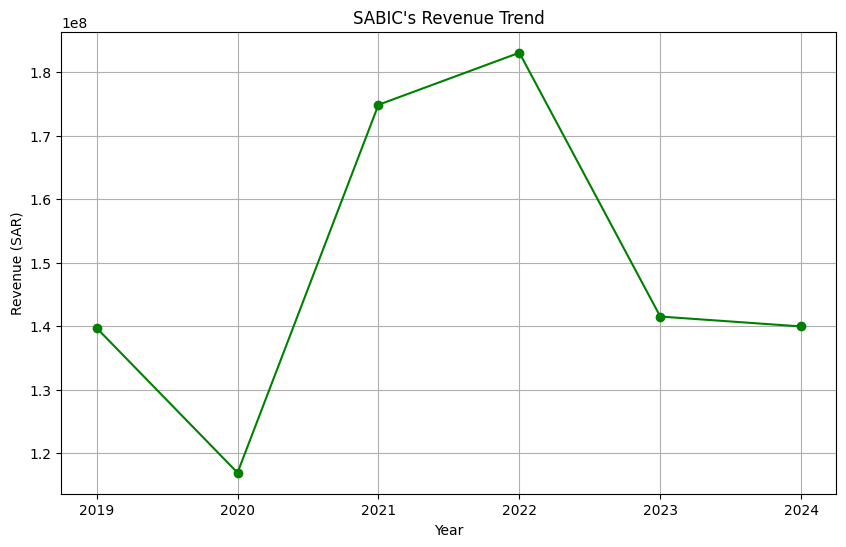

In [10]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(sabic_new_data["Year"], sabic_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("SABIC's Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

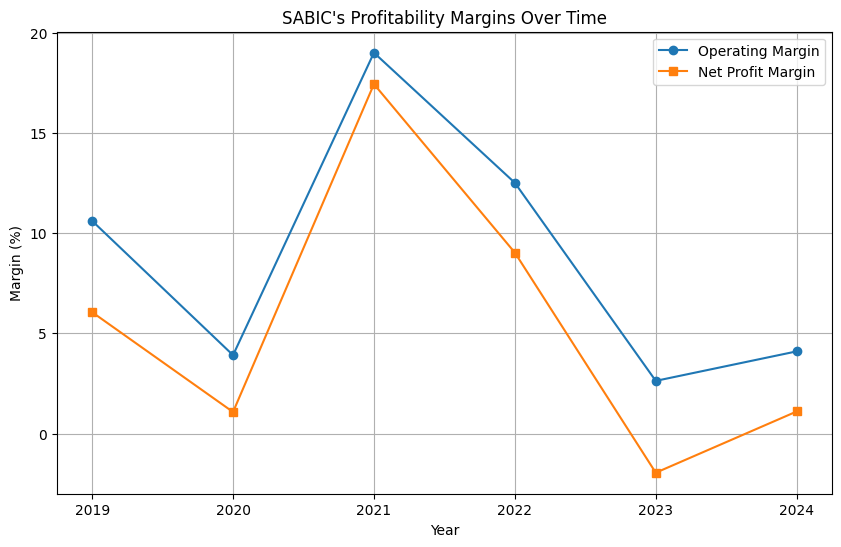

In [11]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(sabic_new_data["Year"], sabic_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(sabic_new_data["Year"], sabic_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("SABIC's Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [12]:
# Save the analysis results to a CSV file
sabic_new_data.to_csv('sabic_analysis_results.csv', index=False)
print("Analysis results saved to 'sabic_analysis_results.csv'")

Analysis results saved to 'sabic_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of SABIC's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.